## What is Ensemble model?

Ensemble models are an ensemble learning method that combines different algorithms together. In this sense, it is a meta-algorithm rather than an algorithm itself. Ensemble learning methods are valuable because they can improve the performance of a predictive model.

- Why ensembles? Ensemble learning methods work off of the idea that tying the predictions of multiple classifiers together will lead to better performance by either improving prediction accuracy or reducing aspects like bias and variance.
    - Lower error
    - Less over-fitting
    - Taste great

- Ensemble Classification model 
  - Ensemble classification models can be powerful machine learning tools capable of achieving excellent performance and generalizing well to new, unseen datasets.

  - The value of an ensemble classifier is that, in joining together the predictions of multiple classifiers, it can correct for errors made by any individual classifier, leading to better accuracy overall.
  
- Voting Ensemble classifier
  - It is one of the simplest way of combining the predictions from multiple machine learning algorithms. Voting classifier isn’t an actual classifier but a wrapper for set of different ones that are trained and valuated in parallel in order to exploit the different peculiarities of each algorithm.
  - A voting classifier can be a good choice whenever a single strategy is not able to reach the desired accuracy threshold. In short voting classifier instead allows the mixing of different classifiers adopting a majority vote to decide which class must be considered as the winning one during a prediction.
  - We can train data set using different algorithms and ensemble then to predict the final output. The final output on a prediction is taken by majority vote according to two different strategies
  
      - Hard voting / Majority voting : Hard voting is the simplest case of majority voting. In this case, the class that received the highest number of votes will be chosen. Here we predict the class label via majority voting of each classifier.
      
      - Soft voting : In this case, the probability vector for each predicted class (for all classifiers) are summed up & averaged. The winning class is the one corresponding to the highest value (only recommended if the classifiers are well calibrated).
           
      
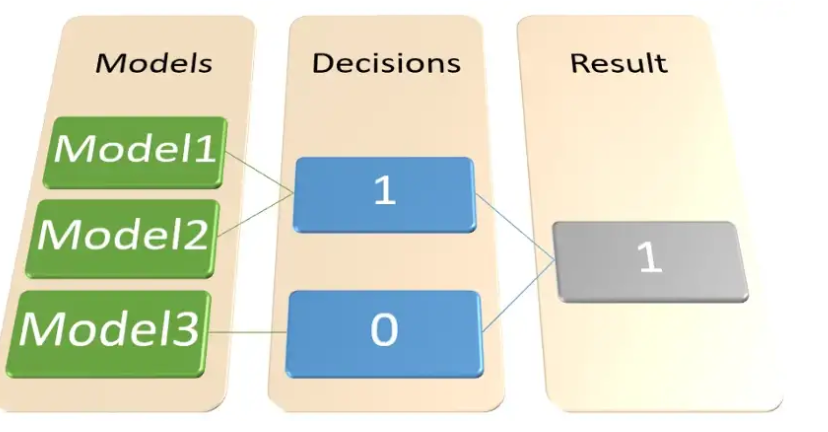

## Import Libraries

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Load the data

In [3]:
X_train=pd.read_csv("X_train.csv",index_col=0)
X_train.shape

(6434, 12)

In [4]:
X_test=pd.read_csv("X_test.csv",index_col=0)
X_test.shape

(1250, 12)

In [5]:
y_train=pd.read_csv("y_train.csv",index_col=0)
y_train.shape

(6434, 1)

In [6]:
y_test=pd.read_csv("y_test.csv",index_col=0)
y_test.shape

(1250, 1)

### Build the optimised decision tree model and get the accuracy

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_best = DecisionTreeClassifier(criterion='gini', #function to measure the quality of a split
                            max_depth =7, #maximum depth of the tree  
                            max_features = 3, #number of features to consider when looking for the best split
                            min_samples_leaf = 2, #minimum number of samples required to be at a leaf node21qaz
                            random_state = 0 #controls the randomness of the estimator
                           )

dt_best

DecisionTreeClassifier(max_depth=7, max_features=3, min_samples_leaf=2,
                       random_state=0)

In [8]:
dt_best.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, max_features=3, min_samples_leaf=2,
                       random_state=0)

In [9]:
y_pred_dt = dt_best.predict(X_test)
y_pred_dt

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(y_test,y_pred_dt)
acc_dt

0.816

### Build the optimised KNN model and get the accuracy

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn_best = KNeighborsClassifier(n_neighbors=11,
                           weights='distance', 
                           algorithm = 'auto', 
                           n_jobs=-1)

knn_best

KNeighborsClassifier(n_jobs=-1, n_neighbors=11, weights='distance')

In [12]:

knn_best.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11, weights='distance')

In [13]:
y_pred_knn = knn_best.predict(X_test)
acc_knn = accuracy_score(y_test,y_pred_knn)
acc_knn

0.8432

### Build the optimised SVM model and get the accuracy

In [14]:
from sklearn import svm

svm_best = svm.SVC(kernel = 'rbf', #Specifies the kernel type to be used in the algorithm,default is 'rbf'
               C=10,          #Regularization parameter,defualt is 0.1
               gamma = 0.06, #Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
               degree = 2,
               
              )

svm_best

SVC(C=10, degree=2, gamma=0.06)

In [15]:
svm_best.fit(X_train,y_train)

SVC(C=10, degree=2, gamma=0.06)

In [16]:
y_pred_svm = svm_best.predict(X_test)
acc_svm = accuracy_score(y_test,y_pred_svm)
acc_svm

0.9352

### Build the optimised logistic regression model and get the accuracy

In [17]:
from sklearn.linear_model import LogisticRegression
lr_best = LogisticRegression(solver='lbfgs',penalty='none',C=0.001)
lr_best

LogisticRegression(C=0.001, penalty='none')

In [18]:
lr_best.fit(X_train,y_train)

LogisticRegression(C=0.001, penalty='none')

In [19]:
y_pred_lr = lr_best.predict(X_test)
acc_lr = accuracy_score(y_test,y_pred_lr)
acc_lr

0.7648

In [20]:
#print the accuracy values of individual models
print("Logistic Regression-Accuracy:{}".format(acc_lr))
print("KNN-Accuracy:{}".format(acc_knn))
print("DT-Accuracy:{}".format(acc_dt))
print("SVM-Accuracy:{}".format(acc_svm))

Logistic Regression-Accuracy:0.7648
KNN-Accuracy:0.8432
DT-Accuracy:0.816
SVM-Accuracy:0.9352


### Build the Ensemble model using voting methodology and get the accuracy

In [21]:
#Ensemble Models
from sklearn.ensemble import VotingClassifier

#create a dictionary of all the base models
estimators = [('KNN',knn_best),
               ('DT',dt_best),
               ('SVM',svm_best),
               ('LR',lr_best)]

estimators

[('KNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=11, weights='distance')),
 ('DT',
  DecisionTreeClassifier(max_depth=7, max_features=3, min_samples_leaf=2,
                         random_state=0)),
 ('SVM', SVC(C=10, degree=2, gamma=0.06)),
 ('LR', LogisticRegression(C=0.001, penalty='none'))]

In [22]:
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, #Invoking the fit clones of those original estimators
                            voting='hard' #hard uses predicted class labels for majority rule voting. 
                                          #soft, predicts the class label based on the argmax of the sums of the predicted probabilities
                           )
ensemble

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=11,
                                                   weights='distance')),
                             ('DT',
                              DecisionTreeClassifier(max_depth=7,
                                                     max_features=3,
                                                     min_samples_leaf=2,
                                                     random_state=0)),
                             ('SVM', SVC(C=10, degree=2, gamma=0.06)),
                             ('LR',
                              LogisticRegression(C=0.001, penalty='none'))])

In [23]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=11,
                                                   weights='distance')),
                             ('DT',
                              DecisionTreeClassifier(max_depth=7,
                                                     max_features=3,
                                                     min_samples_leaf=2,
                                                     random_state=0)),
                             ('SVM', SVC(C=10, degree=2, gamma=0.06)),
                             ('LR',
                              LogisticRegression(C=0.001, penalty='none'))])

In [24]:
y_pred_en = ensemble.predict(X_test)
acc_en = accuracy_score(y_test,y_pred_en)
acc_en

0.9264

### Compare the base models and Ensemble model results

In [25]:
results = pd.DataFrame(list([acc_lr,acc_dt,acc_knn,acc_svm,acc_en]))
results['Model'] = ['Logisitc Regression','Decision Tree','KNN','SVM','Ensemble']
results = results.iloc[:, ::-1]
results.reset_index(drop=True,inplace=True)
results.columns = ['Model','Accuracy']
results


,Model,Accuracy
0,Logisitc Regression,0.7648
1,Decision Tree,0.8160
2,KNN,0.8432
3,SVM,0.9352
4,Ensemble,0.9264


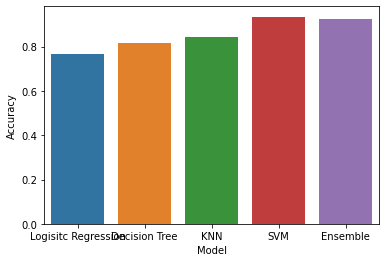

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Model", y="Accuracy", data=results)
plt.show()

### Conclusion



Our base SVM model is the best model, results-wise. But Ensemble models are robust-it reduces the spread or dispersion of the predictions and model performance. Hence we would recommend to use an Ensemble model approach to predict, if a customer will churn or not.